In [2]:
# 自动计算cell的计算时间
%load_ext autotime

#设置使用的gpu
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")

if gpus:
   
    gpu0 = gpus[2] #如果有多个GPU，仅使用第0个GPU
    tf.config.experimental.set_memory_growth(gpu0, True) #设置GPU显存用量按需使用
    # 或者也可以设置GPU显存为固定使用量(例如：4G)
    #tf.config.experimental.set_virtual_device_configuration(gpu0,
    #    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4096)]) 
    tf.config.set_visible_devices([gpu0],"GPU") 

time: 4.23 s (started: 2021-07-22 11:02:14 +08:00)


# Keras 和 TensorFlow 简介

>本章包括
* 深入了解 TensorFlow、Keras 及其关系
* 设置深度学习工作区
* 核心深度学习概念如何转化为 Keras 和 TensorFlow 的概述

本章旨在为您提供在实践中开始深度学习所需的一切。 我们将向您简要介绍 Keras ( keras.io) 和 TensorFlow (tensorflow.org)，这是我们将在整本书中使用的基于 Python 的深度学习工具。 您将了解如何使用 TensorFlow、Keras 和 GPU 支持设置深度学习工作区。 最后，在您在第 2 章中第一次接触 Keras 和 TensorFlow 的基础上，我们将回顾神经网络的核心组件以及它们如何转换为 Keras 和 TensorFlow API。 在本章结束时，您将准备好进入实际的、真实的应用程序——这将从第 4 章开始。

## 什么是Tensorflow

TensorFlow 是一个基于 Python 的免费开源机器学习平台，主要由 Google 开发。 与 NumPy 非常相似，TensorFlow 的主要目的是让工程师和研究人员能够在数值张量上操作数学表达式。 但是 TensorFlow 在以下方面远远超出了 NumPy 的范围：
* 它可以自动计算任何可微表达式的梯度（如您在第 2 章中看到的），使其非常适合机器学习。
* 它不仅可以运行在 CPU 上，还可以运行在 GPU 和 TPU、高度并行的硬件加速器上。
* TensorFlow 中定义的计算可以轻松地分布在多台机器上。
* TensorFlow 程序可以导出到其他运行时，例如 C++、JavaScript（用于基于浏览器的应用程序）或 TFLite（用于在移动设备或嵌入式设备上运行的应用程序）等。这使得 TensorFlow 应用程序易于在实际设置中部署。

重要的是要记住，TensorFlow 不仅仅是一个库。 它确实是一个平台，拥有庞大的组件生态系统，其中一些由 Google 开发，一些由第三方开发。 例如，有用于强化学习研究的 TF-Agents，用于行业强度机器学习工作流管理的 TFX，用于生产部署的 TF-Serving，还有预训练模型的 TF-Hub 存储库……这些组件涵盖了非常广泛的领域 用例，从前沿研究到大规模生产应用。

TensorFlow 的扩展性相当好：例如，橡树岭国家实验室的科学家已经使用它在 IBM Summit 超级计算机的 27,000 个 GPU 上训练了 1.1 ExaFLOP 极端天气预报模型。 同样，谷歌使用 TensorFlow 开发了计算密集型深度学习应用程序，例如国际象棋和围棋代理 AlphaZero。 对于您自己的模型，如果您有预算，您实际上可以希望在一个小型 TPU Pod 或在 Google Cloud 或 AWS 上租用的大型 GPU 集群上扩展到大约 10 PetaFLOP。 这仍然是 2019 年顶级超级计算机峰值计算能力的 1% 左右！

## 什么是Keras?

Keras 是 Python 的深度学习 API，构建在 TensorFlow 之上，提供了一种方便的方式来定义和训练任何类型的深度学习模型。 Keras 最初是为研究而开发的，旨在实现快速的深度学习实验。

通过 TensorFlow，Keras 可以在不同类型的硬件上运行（见图 3.1）——GPU、TPU 或普通 CPU——并且可以无缝扩展到数千台机器。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gsmq42w5hvj31cg0kktbk.jpg)

Keras 以优先考虑开发人员的经验而闻名。 它是面向人类的 API，而不是面向机器的 API。 它遵循减少认知负荷的最佳实践：它提供一致且简单的工作流程，最大限度地减少常见用例所需的操作数量，并针对用户错误提供清晰且可操作的反馈。 这使得 Keras 作为初学者很容易学习，并且作为专家使用时效率很高。

截至 2021 年年中，Keras 拥有超过 400,000 名用户，从初创公司和大公司的学术研究人员、工程师和数据科学家，到研究生和业余爱好者。 谷歌、Netflix、优步、欧洲核子研究中心、美国宇航局、Yelp、Instacart、Square 以及数百家初创公司都在使用 Keras，这些初创公司致力于解决各个行业的各种问题。 您的 YouTube 推荐源自 Keras 模型。 Waymo 自动驾驶汽车是使用 Keras 模型开发的。 Keras 也是机器学习竞赛网站 Kaggle 上的一个流行框架，大多数深度学习竞赛都是使用 Keras 赢得的。

由于 Keras 拥有庞大且多样化的用户群，因此它不会强迫您遵循单一的“真实”方式来构建和训练模型。 相反，它支持各种不同的工作流程，从非常高级到非常低级，对应于不同的用户配置文件。 为了
例如，您有多种构建模型的方法和多种训练模型的方法，每种方法都代表了可用性和灵活性之间的某种权衡。 在第 5 章中，我们将详细回顾这一系列工作流中的大部分内容。 你可以像使用 Scikit-Learn 一样使用 Keras——只是调用并让框架做它的事情——或者你可以像 NumPy 一样使用 fit()——完全控制每一个小细节。

这意味着，一旦您成为专家，您现在开始学习的所有内容仍然具有相关性。 您可以轻松入门，然后逐渐深入到从头开始编写越来越多逻辑的工作流程。 从学生到研究人员，或从数据科学家到深度学习工程师，您无需切换到完全不同的框架。

这种哲学与 Python 本身没有什么不同！ 某些语言仅提供一种编写程序的方法——例如，面向对象编程或函数式编程。 同时，Python 是一种多范式语言：它提供了一系列可能的使用模式，它们可以很好地协同工作。 这使得 Python 适用于各种非常不同的用例：系统管理、数据科学、机器学习工程、Web 开发……或者只是学习如何编程。 同样，您可以将 Keras 视为深度学习的 Python：一种用户友好的深度学习语言，可为不同的用户配置文件提供各种工作流程。

## Keras 和 TensorFlow：简史

Keras 比 TensorFlow 早八个月。 它是2015年3月发布的，而TensorFlow是2015年11月发布的。你可能会问，如果Keras是建立在TensorFlow之上的，那么在TensorFlow发布之前它怎么可能存在？ Keras 最初构建在 Theano 之上，后者是另一个提供自动微分和 GPU 支持的张量操作库——同类中最早的。 Theano 由蒙特利尔大学的蒙特利尔学习算法研究所 (MILA) 开发，在很多方面都是 TensorFlow 的前身。 它开创了使用静态计算图进行自动微分以及将代码编译到 CPU 和 GPU 的想法。

2015 年底，TensorFlow 发布后，Keras 被重构为多后端架构：Keras 与 Theano 或 TensorFlow 一起使用成为可能，两者之间的切换就像更改环境变量一样简单。 到 2016 年 9 月，TensorFlow 已达到技术成熟的水平，可以使其成为 Keras 的默认后端选项。 2017 年，Keras 增加了两个新的后端选项：CNTK（由微软开发）和 MXNet（由亚马逊开发）。 如今，Theano 和 CNTK 都处于不再开发阶段，MXNet 在亚马逊之外也没有广泛使用。 Keras 又回到了单一后端 API——在 TensorFlow 之上。

Keras 和 TensorFlow 多年来一直保持着共生关系。 在整个 2016 年和 2017 年，Keras 以用户友好的方式开发 TensorFlow 应用程序而闻名，它将新用户引入 TensorFlow 生态系统。 到 2017 年底，大多数 TensorFlow 用户通过 Keras 或与 Keras 结合使用它。 2018 年，TensorFlow 领导层选择 Keras 作为 TensorFlow 的官方高级 API。 因此，Keras API 在 2019 年 9 月发布的 TensorFlow 2.0 中处于前沿和中心位置——对 TensorFlow 和 Keras 进行了广泛的重新设计，其中考虑了四年多的用户反馈和技术进步。

至此，您一定渴望开始在实践中运行 Keras 和 TensorFlow 代码。 让我们开始吧。

## 设置深度学习工作区

在开始开发深度学习应用程序之前，您需要设置开发环境。 强烈建议您在现代 NVIDIA GPU 而不是计算机的 CPU 上运行深度学习代码，尽管不是绝对必要的。 某些应用程序——尤其是使用卷积网络的图像处理——在 CPU 上会极其缓慢，即使是快速的多核 CPU。 即使对于实际上可以在 CPU 上运行的应用程序，通过使用最新的 GPU，您通常也会看到速度提高 1 倍或 5 倍或 10 倍。

要在 GPU 上进行深度学习，您有以下三种选择：
* 购买并在您的工作站上安装物理 NVIDIA GPU。
* 在 Google Cloud Platform 或 AWS EC2 上使用 GPU 实例。
* 使用 Colaboratory 提供的免费 GPU 运行时，这是 Google 提供的托管笔记本服务（有关什么是“笔记本”的详细信息，请参阅下一节）。

Colaboratory 是最简单的入门方式，因为它不需要购买硬件，也不需要安装软件——只需在浏览器中打开一个选项卡并开始编码。 这是我们推荐用于运行本书中的代码示例的选项。 但是，Colaboratory 的免费版本仅适用于小型工作负载。 如果您想扩大规模，则必须使用第一个或第二个选项。

如果您还没有可用于深度学习的 GPU（最近推出的高端 NVIDIA GPU），那么在云中运行深度学习实验是一种简单、低成本的方式，可让您迁移到更大的平台 工作负载，而无需购买任何额外的硬件。 如果您使用 Jupyter notebook 进行开发，那么在云端运行的体验与在本地运行没有什么不同。

但是，如果您是深度学习的重度用户，那么这种设置从长远来看是不可持续的——甚至超过几个月。 云实例并不便宜：到 2019 年底，您需要为 Google Cloud 上的 P100 GPU 支付每小时 1.46 美元。与此同时，坚固的消费级 GPU 将花费您大约 1,500 到 2,500 美元——这个价格已经相当 随着时间的推移稳定，即使这些 GPU 的规格不断改进。 如果您是深度学习的重度用户，请考虑使用一个或多个 GPU 设置本地工作站。

此外，无论您是在本地运行还是在云端运行，最好使用 Unix 工作站。 尽管技术上可以直接在 Windows 上运行 Keras，但我们不建议这样做。 如果您是 Windows 用户并且想自己进行深度学习
工作站，让一切运行的最简单解决方案是在您的机器上设置 Ubuntu 双引导，或者利用适用于 Linux 的 Windows 子系统 (WSL)，这是一个兼容层，使您能够从 Windows 运行 Linux 应用程序。 这可能看起来很麻烦，但从长远来看，它会为您节省大量时间和麻烦。

### Jupyter notebooks：运行深度学习实验的首选方式

Jupyter notebook 是运行深度学习实验的好方法——尤其是本书中的许多代码示例。 它们被广泛用于数据科学和机器学习社区。 A 是由 Jupyter Notebook 应用程序 ( jupyter.org ) 生成的文件，您可以在浏览器中编辑该 notebook。 它混合了执行 Python 代码的能力和丰富的文本编辑能力，用于注释你正在做的事情。 笔记本还允许您将长时间的实验分解成可以独立执行的较小部分，这使得开发具有交互性，并且意味着如果实验后期出现问题，您不必重新运行所有以前的代码。

我们建议使用 Jupyter notebooks 开始使用 Keras，尽管这不是必需的：您还可以运行独立的 Python 脚本或从 IDE（例如 PyCharm）中运行代码。 本书中的所有代码示例都可以作为开源笔记本使用； 你可以在 github.com/fchollet/deep-learning-with-python-notebooks 从 Githum 下载它们。

### 使用Colaboratory

Colaboratory（或简称 Colab）是一种免费的 Jupyter notebook 服务，无需安装，完全在云端运行。 实际上，它是一个网页，可让您立即编写和执行 Keras 脚本。 它让您可以访问免费（但有限）的 GPU 运行时甚至 TPU 运行时，因此您无需购买自己的 GPU。 我们推荐使用 Colaboratory 来运行本书中的代码示例。

**COLABORATORY的第一步**

要开始使用 Colab，请转到 colab.research.google.com 并单击“新建笔记本”按钮。 您将进入标准 Notebook 界面：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gsmrbwot3dj31am0k4q4i.jpg)

您会注意到工具栏中的两个按钮：“+ 代码”和“+ 文本”。 它们分别用于创建可执行的 Python 代码单元和注释文本单元。 在代码单元格中输入代码后，点击Shift+Enter将执行它，像这样：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gsmrd4g9dtj31aw0k4dhr.jpg)

在文本单元格中，您可以使用 Markdown 语法（见图 3.4）。 在文本移位输入单元格上点击Shift+Enter将呈现它。：

![](https://tva1.sinaimg.cn/large/008i3skNgy1gsmre6mh15j31c80tcwh9.jpg)

文本单元格可用于为您的笔记本提供可读结构：使用它们为您的代码添加部分标题、长解释段落或嵌入数字。 笔记本是一种多媒体体验！

**使用 PIP 安装软件包**

默认的 Colab 环境已经安装了 TensorFlow 和 Keras，因此您无需任何安装步骤即可立即开始使用。 但是，如果您需要使用 安装某些东西，您可以通过在代码单元格中使用以下语法来实现（请注意，pip 行以 , 开头，表示它是一个 shell 命令而不是 Python 代码）：

In [2]:
!pip install package_name

Looking in indexes: https://pypi.douban.com/simple
  Created wheel for package-name: filename=package_name-0.1-py3-none-any.whl size=1267 sha256=e62af97569f2a96e6809f2c5144895dbacc1fa9aafb3eb2e85252309a6d686e9
  Stored in directory: /home/huangwei/.cache/pip/wheels/f0/a3/8f/8e652cfb05a64c109d7c2401a8d27f89e84f1e096ced089e22
Successfully built package-name
time: 7.17 s (started: 2021-07-20 07:56:45 +08:00)


**使用 GPU 运行时间**

要在 Colab 中使用 GPU 运行时，请转到“运行时”→“更改运行时类型”，然后选择“GPU”（见图 3.5）。

![](https://tva1.sinaimg.cn/large/008i3skNgy1gsmrgqh04ij314g0r2taf.jpg)

如果 GPU 可用，TensorFlow 和 Keras 将自动在 GPU 上执行，因此在选择 GPU 运行时后您无需再执行任何操作。 您会注意到“硬件加速器”下拉菜单中还有一个 TPU 运行时选项。 与 GPU 运行时不同，将 TPU 运行时与 TensorFlow 和 Keras 结合使用确实需要在代码中进行一些手动设置。 我们将在第 13 章中介绍这一点。

目前，我们建议您坚持使用 GPU 运行时来遵循本书中的代码示例。

您现在可以开始在实践中运行 Keras 代码了。 接下来，让我们看看您在第 2 章中学到的关键思想如何转化为 Keras 和 TensorFlow 代码。

## 使用 TensorFlow 的第一步

正如您在前几章中看到的，训练神经网络围绕以下概念：

首先，低级张量操作——所有现代机器学习的基础架构。 这转化为 TensorFlow API：
* 张量，包括存储网络状态 ( ) 变量的特殊张量
* 加法、relu、matmul等张量运算
*反向传播，一种计算数学表达式梯度的方法（在 TensorFlow 中通过 GradientTape 对象处理）

第二，高级深度学习概念。 这转化为 Keras API：
* 层，它们组合成一个模型
* 一个损失函数，它定义了用于学习的反馈信号
* 一个优化器 ，它决定了学习如何进行优化器
* 评估模型性能的指标，例如准确性
* 执行小批量随机梯度下降的训练循环

在上一章中，您已经初步接触了一些相应的 TensorFlow 和 Keras API：您已经简要地使用了 TensorFlow 的 Variable 类、matmul 操作和 GradientTape。 您已经实例化了 Keras Dense 层，将它们打包到一个 Sequential 模型中，并使用 fit 方法训练该模型。

现在，让我们深入探讨如何使用 TensorFlow 和 Keras 在实践中处理上述所有不同概念。

**常数张量和变量**

要在 TensorFlow 中做任何事情，我们需要一些张量。 张量需要用一些初始值创建，所以创建张量的常用方法是：

> 清单 3.1 全一或全零张量

In [30]:
import tensorflow as tf
x = tf.ones(shape=(2, 1)) 
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)
time: 6 ms (started: 2021-07-20 17:35:45 +08:00)


In [31]:
x = tf.zeros(shape=(2, 1))
x

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

time: 12 ms (started: 2021-07-20 17:36:05 +08:00)


> 清单 3.2 随机张量

In [40]:
# 从均值为 0 和标准差为 1 的正态分布中抽取的随机值张量。
# 相当于 np.random.normal(size=(3, 1), loc=0., scale=1.)。
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[ 0.11833647],
       [-0.53093547],
       [-0.6279465 ]], dtype=float32)>

time: 4.94 ms (started: 2021-07-20 17:39:23 +08:00)


In [41]:
#从 0 和 1 之间的均匀分布中抽取的随机值张量。
# 相当于 np.random.uniform(size=(3, 1), low=0., high=1.)。
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
x

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.95609   ],
       [0.17031908],
       [0.7562015 ]], dtype=float32)>

time: 8.35 ms (started: 2021-07-20 17:39:58 +08:00)


In [37]:
print(x)

tf.Tensor(
[[0.16544342]
 [0.18660843]
 [0.32238173]], shape=(3, 1), dtype=float32)
time: 1.32 ms (started: 2021-07-20 17:38:03 +08:00)


NumPy 数组和 TensorFlow 张量之间的显着区别在于 TensorFlow 张量不可分配：它们是常数。 例如，在 NumPy 中，您可以执行以下操作：

> 清单 3.3 NumPy 数组是可赋值的

In [42]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

time: 471 µs (started: 2021-07-20 17:41:16 +08:00)


尝试在 TensorFlow 中做同样的事情：你会得到一个错误，“EagerTensor 对象不支持项目分配”。

> 清单 3.4 TensorFlow 张量不可分配

In [43]:
x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

time: 123 ms (started: 2021-07-20 17:42:01 +08:00)


为了训练一个模型，我们需要更新它的状态，它是一组张量。 如果张量不可赋值，那我们怎么做呢？ 这就是变量的用武之地。 tf.Variable 是用于管理 TensorFlow 中可修改状态的类。 您已经在第 2 章末尾的训练循环实现中简要地看到了它的实际作用。

In [44]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 0.64557743],
       [ 1.7590712 ],
       [-0.0507943 ]], dtype=float32)>

time: 9.63 ms (started: 2021-07-20 17:42:50 +08:00)


可以通过其方法修改变量的状态：assign

> 清单 3.6 为变量赋值

In [45]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

time: 14.1 ms (started: 2021-07-20 17:44:01 +08:00)


它也适用于系数的子集：

In [46]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

time: 16.3 ms (started: 2021-07-20 17:44:35 +08:00)


类似地，assign_add和assign_sub and 是  +=和-= 的有效等价物：

In [47]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

time: 13.2 ms (started: 2021-07-20 17:47:24 +08:00)


In [48]:
v.assign_sub(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

time: 4.66 ms (started: 2021-07-20 17:47:33 +08:00)


In [49]:
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

time: 2.37 ms (started: 2021-07-20 17:47:35 +08:00)


**张量操作：在张量流中做数学运算**

就像 NumPy 一样，TensorFlow 提供了大量张量运算来表达数学公式。 这里有一些例子：

In [50]:
a = tf.ones((2, 2))
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

time: 7.37 ms (started: 2021-07-20 17:48:51 +08:00)


In [51]:
b = tf.square(a) 
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

time: 4.5 ms (started: 2021-07-20 17:48:57 +08:00)


In [52]:
c = tf.sqrt(a) 
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.]], dtype=float32)>

time: 8.67 ms (started: 2021-07-20 17:49:27 +08:00)


In [53]:
d = b + c 
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

time: 6.12 ms (started: 2021-07-20 17:49:33 +08:00)


In [54]:
e = tf.matmul(a, b) 
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

time: 1.81 s (started: 2021-07-20 17:49:50 +08:00)


In [55]:
a@b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

time: 2.49 ms (started: 2021-07-20 17:49:57 +08:00)


In [56]:
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4., 4.],
       [4., 4.]], dtype=float32)>

time: 4.54 ms (started: 2021-07-20 17:50:11 +08:00)


重要的是，我们刚刚编写的每个操作都会即时执行：在任何时候，您都可以打印当前结果，就像在 NumPy 中一样。 我们称之为急切执行。

**再看一下 GradientTape API**

到目前为止，TensorFlow 看起来很像 NumPy。 但 NumPy 无法做到这一点：检索任何可微表达式相对于其任何输入的梯度。 只需打开一个 GradientTape 范围，对一个或多个输入张量应用一些计算，并检索结果相对于输入的梯度。

In [58]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
gradient

<tf.Tensor: shape=(), dtype=float32, numpy=6.0>

time: 6.55 ms (started: 2021-07-20 17:52:29 +08:00)


这最常用于检索模型相对于其权重的损失梯度：gradients = tape.gradient(loss, weights)。

在第 2 章中，您已经看到 GradientTape 如何处理单个输入或输入列表，以及输入如何可以是标量或高维张量。

到目前为止，您只看到了 tape.gradient() 中的输入张量是 TensorFlow 变量的情况。 这些输入实际上可能是任意张量。 但是，默认情况下只跟踪可训练的变量。 使用常量张量，您必须手动将其标记为正在跟踪，方法是在其上调用 tape.watch()：

In [59]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

time: 5.63 ms (started: 2021-07-20 17:56:02 +08:00)


为什么？ 因为抢先存储计算任何事物相对于任何事物的梯度所需的信息太昂贵了。 为避免浪费资源，磁带需要知道该看什么。 默认情况下会监视可训练变量，因为计算关于可训练变量列表的损失梯度是梯度磁带最常见的用例。

梯度带是一个强大的工具，甚至能够计算二阶梯度，即梯度的梯度。 例如，一个物体的位置相对于时间的梯度就是这个物体的速度，二阶梯度就是它的加速度。

如果你随时间测量一个下落的苹果在垂直轴上的位置，发现它验证了 position(time) = 4.9 * time ** 2，它的加速度是多少？ 让我们使用两个嵌套的渐变磁带来找出答案。

In [60]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

time: 13.3 ms (started: 2021-07-20 17:58:17 +08:00)


In [61]:
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

time: 1.95 ms (started: 2021-07-20 17:58:23 +08:00)


**端到端示例：纯张量流中的线性分类器**

您了解张量、变量、张量运算，并且您知道如何计算梯度。 这足以构建任何基于梯度下降的机器学习模型。 而你只是在第 3 章！

在机器学习工作面试中，您可能会被要求在 TensorFlow 中从头开始实现一个线性分类器：这是一项非常简单的任务，可在具有一些机器学习背景的候选人和没有机器学习背景的候选人之间进行筛选。 让我们让您通过过滤器，并使用您对 TensorFlow 的新知识来实现这样一个线性分类器。

首先，让我们想出一些很好的线性可分合成数据来处理：二维平面中的两类点。

In [64]:
num_samples_per_class = 1000

# 生成第一类点：1000 个具有指定“均值”和“协方差矩阵”的随机二维点。 
# 直观上，“协方差矩阵”描述了下图中点云的形状，“均值”描述了它在平面中的位置。 
# cov=[[1, 0.5],[0.5, 1]] 对应于“一个从左下角到右上角的椭圆形点云”。
negative_samples = np.random.multivariate_normal(
    mean=[0, 3], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class) 

# 生成具有差异均值和相同协方差矩阵的另一类点（具有不同位置和相同形状的点云）。
positive_samples = np.random.multivariate_normal(
    mean=[3, 0], cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

time: 1.84 ms (started: 2021-07-20 18:06:15 +08:00)


negative_samples 和 positive_samples 都是具有 shape 的数组。 让我们将 (1000, 2) 它们堆叠成一个形状为 (2000, 2) 的数组

In [65]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

time: 551 µs (started: 2021-07-20 18:07:03 +08:00)


让我们生成相应的目标标签，一个由 0 和 1 组成的形状为 (2000, 1) 的数组，其中如果属于 0 类（反之亦然），则 target[i, 0] 输入 [i] 为 0：

In [66]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

time: 1.74 ms (started: 2021-07-21 12:26:45 +08:00)


让我们用 Matplotlib 绘制我们的数据，这是一个著名的 Python 数据可视化库（它预装在 Colab 中，因此您无需自己安装）：

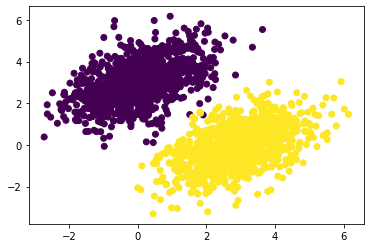

time: 743 ms (started: 2021-07-21 12:27:20 +08:00)


In [67]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

现在，让我们创建一个可以学习分离这两个 blob 的线性分类器。 线性分类器是经过训练的仿射变换（预测 = W • 输入 + b）以最小化预测与目标之间的差异的平方。

正如您将看到的，它实际上是一个比第 2 章末尾的玩具两层神经网络的端到端示例简单得多的示例。 但是，这一次，您应该能够理解有关代码的所有内容 ， 逐行。

让我们创建变量，并分别用随机值和零初始化：

In [69]:
input_dim = 2 
output_dim = 1 
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

time: 12.9 ms (started: 2021-07-21 12:31:20 +08:00)


这是我们的前向传递函数：

In [70]:
def model(inputs):
    return tf.matmul(inputs, W) + b

time: 714 µs (started: 2021-07-21 12:32:26 +08:00)


因为我们的线性分类器对 2D 输入进行操作，实际上只是两个标量系数 w1 和 w2 W2:W = [[w1], [w2]]。同时， 是单个标量系数。 因此，对于给定的输入 b
point ，它的预测值为：[x, y] prediction = [[w1], [w2]] • [x, y] + b = w1 * x + w2 * y + b。

这是我们的损失函数：

In [71]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) 
    return tf.reduce_mean(per_sample_losses)

time: 763 µs (started: 2021-07-21 12:42:31 +08:00)


现在，训练步骤，它接收一些训练数据并更新权重 W 和 b 以最小化数据的损失：

In [72]:
learning_rate = 0.1
def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(predictions, targets) 
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b]) 
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

time: 1.06 ms (started: 2021-07-21 12:44:47 +08:00)


为简单起见，我们将进行批量训练，而不是小批量训练：我们将在整个数据上运行每个训练步骤（梯度计算和权重更新），而不是小批量迭代数据。 一方面，这意味着每个训练步骤都需要更长的时间来运行，因为我们一次计算了 2000 个样本的前向传播和梯度。 另一方面，每次梯度更新将更有效地减少训练数据的损失，因为它将包含来自所有训练样本的信息，而不是仅 128 个随机样本。 因此，我们将需要更少的训练步骤，并且我们应该使用比我们通常用于小批量训练的学习率更大的学习率（我们将使用 learning_rate = 0.1，如上定义）。

In [73]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 1.1959
Loss at step 1: 0.1469
Loss at step 2: 0.1014
Loss at step 3: 0.0909
Loss at step 4: 0.0847
Loss at step 5: 0.0794
Loss at step 6: 0.0746
Loss at step 7: 0.0703
Loss at step 8: 0.0663
Loss at step 9: 0.0627
Loss at step 10: 0.0594
Loss at step 11: 0.0564
Loss at step 12: 0.0537
Loss at step 13: 0.0512
Loss at step 14: 0.0489
Loss at step 15: 0.0468
Loss at step 16: 0.0450
Loss at step 17: 0.0432
Loss at step 18: 0.0417
Loss at step 19: 0.0402
Loss at step 20: 0.0389
Loss at step 21: 0.0377
Loss at step 22: 0.0367
Loss at step 23: 0.0357
Loss at step 24: 0.0348
Loss at step 25: 0.0339
Loss at step 26: 0.0332
Loss at step 27: 0.0325
Loss at step 28: 0.0319
Loss at step 29: 0.0313
Loss at step 30: 0.0308
Loss at step 31: 0.0303
Loss at step 32: 0.0299
Loss at step 33: 0.0295
Loss at step 34: 0.0292
Loss at step 35: 0.0288
Loss at step 36: 0.0285
Loss at step 37: 0.0283
Loss at step 38: 0.0280
Loss at step 39: 0.0278
time: 322 ms (started: 2021-07-21 12:47:36 +08:00)

40 步后，训练损失似乎稳定在 0.025 左右。 让我们绘制我们的线性模型如何对训练数据点进行分类。 因为我们的目标是 0 和 1，如果预测值低于 0.5，给定的输入点将被归类为“0”，如果它高于 0.5，则被归类为“1”：

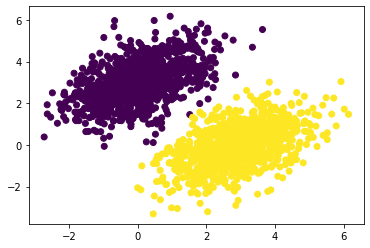

time: 181 ms (started: 2021-07-21 12:49:53 +08:00)


In [74]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

回想一下，给定点的预测值只是 [x, y] 预测 == [[w1], [w2]] • [x, y] + b == w1 * x + w2 * y + b。因此，“0”类定义为：w1 * x + w2* y + b < 0.5，“1”类定义为：w1 * x + w2 * y + b > 0.5。 您会注意到您所看到的实际上是 2D 平面中一条直线的方程：w1 * x + w2 * y + b = 0.5。在线上方为 1 类，线下方为 0 类。您可能习惯于以 y = a * x + b; 格式查看线方程。 以相同的格式，我们的行变成：y = - w1 / w2 * x +(0.5 - b) / w2。

让我们绘制这条线：

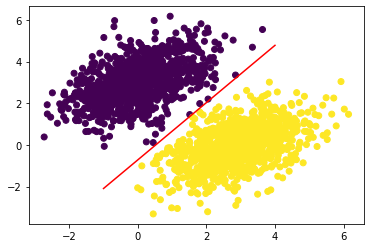

time: 192 ms (started: 2021-07-21 12:52:04 +08:00)


In [75]:
x = np.linspace(-1, 4, 100) 
y = - W[0] / W[1] * x + (0.5 - b) / W[1] 
plt.plot(x, y, "-r") 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

这就是线性分类器的真正意义所在：找到一条直线（或者，在高维空间中，一个超平面）的参数，将两类数据巧妙地分开。

## 神经网络剖析：了解核心 Keras API

至此，您已经了解了 TensorFlow 的基础知识，并且可以使用它从头开始实现一个玩具模型，例如上面的批线性分类器，或者第 2 章末尾的玩具神经网络。 这是一个坚实的基础 . 现在是时候转向更高效、更稳健的深度学习路径了：Keras API。

### 层：深度学习的基石

层神经网络中的基本数据结构是 ，在第 2 中介绍了它。层是一个数据处理模块，它以一个或多个张量作为输入并输出一个或多个张量。 有些层是无状态的，但更常见的是层有一个状态：该层的 ，一个或几个通过随机梯度下降学习的张量，它们的权重一起包含网络的知识。

不同类型的层适用于不同的张量格式和不同类型的数据处理。 例如，存储在二维形状张量（样本、特征）中的简单矢量数据通常由密集连接层处理，也称为全连接密集层（Keras 中的类）。 序列数据存储在形状为 Dense（样本、时间步长、特征）的 3D 张量中，通常由层处理，例如层或循环 LSTM 1D 卷积层 Conv1D()。 存储在 4D 张量中的图像数据通常由 2D Conv1D() 卷积层处理。

您可以将层视为深度学习的乐高积木，这是 Keras 明确表达的隐喻。 在 Keras 中构建深度学习模型是通过将兼容层剪辑在一起来完成的形成有用的数据转换管道。

**KERAS 中的基础类**

一个简单的 API 应该有一个单一的抽象，一切都围绕着它。 在 Keras 中，这就是类。 Keras 中的一切要么是一个层，要么是层与层紧密交互的东西。

层是封装了一些状态（权重）和一些计算（前向传递）的对象。 权重通常在 build() 中定义（尽管它们也可以在构造函数 init() 中创建），并且计算在call()方法中定义。

在上一章中，我们实现了一个包含两个权重 W 和 b 的 NaiveDense 类，并应用了计算 output = activation(dot(input, W) + b)。 这是同一层在 Keras 中的样子：

In [6]:
from tensorflow import keras

# 所有 Keras 层都继承自基类。
class SimpleDense(keras.layers.Layer): 
    
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    #权重创建发生在该方法中。    
    def build(self, input_shape):
        input_dim = input_shape[-1]
        
        # add_weight 是创建权重的快捷方法。 
        # 也可以创建独立变量并将它们分配为层属性，
        # 例如：self.W = tf.Variable(tf.random.uniform(w_shape))。
        self.W = self.add_weight(shape=(input_dim, self.units), 
        initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
        initializer="zeros")
        
        #我们在方法中定义了前向传递计算。
    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

time: 1.34 ms (started: 2021-07-22 11:04:22 +08:00)


在下一节中，我们将详细介绍这些 build() 和 call() 方法的用途。 如果您还不了解所有内容，请不要担心！

一旦实例化，这样的层就可以像函数一样使用，将 TensorFlow 张量作为输入：

In [78]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)

time: 12.8 ms (started: 2021-07-21 13:26:14 +08:00)


In [79]:
input_tensor = tf.ones(shape=(2, 784))

time: 9.49 ms (started: 2021-07-21 13:26:26 +08:00)


In [80]:
output_tensor = my_dense(input_tensor)
output_tensor.shape

TensorShape([2, 32])

time: 16.5 ms (started: 2021-07-21 13:26:46 +08:00)


现在，您可能想知道，为什么我们必须实现call() 和 build() ，因为我们最终通过简单地调用它来使用我们的层，也就是说，通过使用它的方法？ 这是调用，因为我们希望能够及时创建状态。 让我们看看它是如何工作的。

**自动形状推理：动态构建层**

就像乐高积木一样，您只能将这里的兼容性层组装在一起。概念兼容特指这样一个事实，即每一层只接受某种形状的输入张量，并返回某种形状的输出张量。 考虑以下示例：

In [5]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

time: 3.04 ms (started: 2021-07-22 11:04:16 +08:00)


该层将返回一个张量，其中第一维已转换为 32。它只能连接到期望 32 维向量作为其输入的下游层。

使用 Keras 时，大多数时候您不必担心尺寸兼容性，因为您添加到模型中的层是动态构建的，以匹配传入层的形状。 例如，假设您编写以下内容：

In [4]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu", input_shape=(20,)),
    layers.Dense(32)
])

time: 1.72 s (started: 2021-07-22 11:04:11 +08:00)


In [88]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
Total params: 1,728
Trainable params: 1,728
Non-trainable params: 0
_________________________________________________________________
time: 2.18 ms (started: 2021-07-21 13:36:55 +08:00)


这些层没有收到有关其输入形状的任何信息——相反，它们会自动将其输入形状推断为它们看到的第一个输入的形状。

在我们在第 2 章中实现的Dense层的玩具版本中（我们将其命名为 NaiveDense），我们必须将层的输入大小显式传递给构造函数，以便
能够创建它的权重。 这并不理想，因为它会导致模型看起来像这样，每个新层都需要知道它之前的层的形状：

In [ ]:
model = NaiveSequential([
    NaiveDense(input_size=784, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=64, activation="relu"),
    NaiveDense(input_size=64, output_size=32, activation="relu"),
    NaiveDense(input_size=32, output_size=10, activation="softmax")
])

当一个层用来产生其输出形状的规则很复杂时，情况会更糟。 例如，如果我们的层返回形状的输出（batch, input_size * 2 if input_size % 2 == 0 else input_size * 3）怎么办？

如果我们将 NaiveDense 层重新实现为能够自动进行形状推断的 Keras 层，它会更简单，就像上面的 SimpleDense 层（请参阅代码块 TODO）及其方法。

在 SimpleDense 中，我们不再像在 NaiveDense 示例中那样在构造函数中创建权重，而是在专用的状态创建方法中创建它们，该方法接收 build() 作为层看到的第一个输入形状的参数。 该方法在第一次调用层时自动调用 build()（通过它的 call() 方法）。 事实上，这就是为什么我们在单独的 call() 方法中而不是直接在方法中定义计算！ 基础层的call()方法示意图如下：

In [92]:
def __call__(self, inputs):
    if not self.built:
        self.build(inputs.shape)
        self.built = True
    return self.call(inputs)

time: 755 µs (started: 2021-07-21 13:45:18 +08:00)


通过自动形状推断，我们之前的示例变得简单而整洁：

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

请注意，自动形状推断并不是 Layer 类的 call() 方法处理的唯一内容。 它处理更多的事情，特别是在急切图执行之间的路由（您将在第 6 章中了解的概念）和输入屏蔽（我们将在第 11 章中介绍）。 现在，请记住：在实现您自己的层时，将前向传递放在 call() 方法中。

### 从层到模型

深度学习模型是层的图。 在 Keras 中，这就是类。 现在，您只看到了 Model 序列模型（ 的子类），它们是简单的层堆栈，将 Model 的单个输入映射到单个输出。 但是随着您的前进，您将接触到更广泛的网络拓扑。 一些常见的有：
* 两分支网络
* 多头网络
* 剩余连接

网络拓扑可能会非常复杂。 例如，这是 Transformer 层图的拓扑结构，这是一种设计用于处理文本数据的通用架构：

##Figure 3.9

在 Keras 中构建这样的模型通常有两种方法：您可以直接继承 Model 类，或者您可以使用 Functional API，它可以让您用更少的代码做更多的事情。 我们将在第 7 章中介绍这两种方法。

模型的拓扑定义了一个假设空间。 您可能还记得在第 1 章中，我们将机器学习描述为“使用来自反馈信号的指导，在预定义的可能性空间内搜索某些输入数据的有用表示”。 通过选择网络拓扑，您可以将可能性空间（假设空间）限制为一系列特定的张量运算，将输入数据映射到输出数据。 然后，您将搜索这些张量运算中涉及的权重张量的一组很好的值。

要从数据中学习，您必须对其进行假设。 这些假设定义了可以学习的内容。 因此，假设空间的结构——模型的架构——极其重要。 它编码了您对问题所做的假设，即模型开始时的先验知识。 例如，如果您正在处理一个二分类问题，模型由单层组成，没有激活（纯 Dense
仿射变换），您假设您的两个类是线性可分的。

选择正确的网络架构与其说是科学，不如说是一门艺术； 尽管有一些最佳实践和原则可供您信赖，但只有实践才能帮助您成为一名合适的神经网络架构师。 接下来的几章将教你构建神经网络的明确原则，并帮助你培养直觉，判断哪些对特定问题有效，哪些无效。 您将对哪种类型的模型架构适用于不同类型的问题、如何在实践中构建这些网络、如何选择正确的学习配置以及如何调整模型直到产生您想要的结果建立坚实的直觉。

### “编译”步骤：配置学习过程

一旦定义了模型架构，您还需要再选择三件事：
* 损失函数（目标函数）——在训练过程中将被最小化的数量。 它代表了手头任务成功的衡量标准。
* 优化器——根据损失函数确定网络将如何更新。 它实现了随机梯度下降 (SGD) 的特定变体。
* 指标 - 您希望在训练和验证期间监控的成功度量，例如分类准确性。 与损失不同，训练不会直接针对这些指标进行优化。 因此，指标不需要是可微的。

一旦你选择了你的损失、优化器和指标，你就可以使用内置的 compile() 和 fit() 方法来开始训练你的模型。 或者，您也可以编写自己的自定义训练循环——我们将在第 6 章中介绍如何做到这一点。还有很多工作要做！ 现在，让我们看看 compile() 和 fit()。

该方法配置了训练过程——您已经在第 2 章的第一个神经网络示例 compile() 中介绍了它。它采用参数：优化器loss和metrics（一个列表）：

In [7]:
model = keras.Sequential([keras.layers.Dense(1)]) 
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

time: 294 ms (started: 2021-07-22 11:04:29 +08:00)


在上面对 compile() 的调用中，我们将优化器、损失和指标作为字符串（例如“rmsprop”）传递。 这些字符串实际上是转换为 Python 对象的快捷方式。 例如，“rmsprop”变为 keras.optimizers.RMSprop()。 重要的是，也可以将这些参数指定为对象实例，如下所示：

In [8]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

time: 19.4 ms (started: 2021-07-22 11:04:31 +08:00)


如果您想传递自己的自定义损失或指标，或者如果您想进一步配置您正在使用的对象，这将非常有用——例如，通过将 learning_rate 参数传递给优化器：

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              loss=my_custom_loss,
              metrics=[my_custom_metric_1, my_custom_metric_2])

在第 6 章中，我们将介绍如何创建自定义损失和指标。 一般来说，您不必从头开始创建自己的损失、指标或优化器，因为 Keras 提供了广泛的内置选项，可能包括您需要的内容：

**Optimizers:**
* SGD() (with or without momentum)
* RMSprop()
* Adam()
* Adagrad()
* Etc.

**Losses:**
* CategoricalCrossentropy()
* SparseCategoricalCrossentropy()
* BinaryCrossentropy()
* MeanSquaredError()
* KLDivergence()
* CosineSimilarity()
* Etc.

**Metrics:**
* CategoricalAccuracy()
* SparseCategoricalAccuracy()
* BinaryAccuracy()
* AUC()
* Precision()
* Recall()
* Etc.

在本书中，您将看到许多这些选项的具体应用。

### 选择一个损失函数

为正确的问题选择正确的损失函数非常重要：您的网络将采取任何可能的捷径来最小化损失； 因此，如果目标与手头任务的成功不完全相关，您的网络最终会做您可能不想要的事情。 想象一个通过 SGD 训练的愚蠢的、全能的 AI，其目标函数选择不当：“最大化所有活着的人类的平均幸福感”。 为了让工作更轻松，这个 AI 可能会选择杀死除少数人之外的所有人类，并专注于其余人的福祉——因为平均福祉不受剩下多少人的影响。 这可能不是你想要的！ 请记住，您构建的所有神经网络在降低其损失函数方面都将同样无情——所以明智地选择目标，否则您将不得不面对意想不到的副作用。

幸运的是，当涉及到分类、回归和序列预测等常见问题时，您可以遵循一些简单的指南来选择正确的损失。 例如，您将对二分类问题使用二元交叉熵，对多类分类问题使用分类交叉熵，等等。 只有当你在研究真正的新研究问题时，你才必须开发自己的损失函数。 在接下来的几章中，我们将明确详细说明为广泛的常见任务选择哪些损失函数。

### 理解fit方法

在 compile() 之后是 fit()。 该方法实现了训练循环本身。 它的关键拟合参数是：
* 要训练的数据（输入和目标）。 它通常以NumPy 数组或 TensorFlow 对象的形式传递。 您将在下一章中了解有关 Dataset Dataset API 的更多信息。 
* 训练次数：训练循环应该在数据传递的时期内迭代多少次。 
* 在小批量梯度下降的每个时期内使用的批量大小：考虑为一个权重更新步骤计算梯度的训练示例的数量。

In [11]:
history = model.fit(
    # 输入示例，作为 NumPy 数组
    inputs, 
    # 相应的训练目标，作为一个 NumPy 数组
    targets, 
    # 训练循环将遍历数据 5 次。
    epochs=5, 
    # 训练循环将分批迭代 128 个示例的数据。
    batch_size=128 
)

调用返回一个 History 对象。 该对象包含一个历史字段，它是一个字典拟合，将键（例如“损失”或特定度量名称）映射到其每个时期值的列表。

In [ ]:
history.history

### 监控验证数据的损失和指标

机器学习的目标不是获得在训练数据上表现良好的模型——这很容易，你所要做的就是跟随梯度。 目标是获得总体上表现良好的模型，特别是在模型以前从未遇到过的数据点上。 仅仅因为模型在其训练数据上表现良好并不意味着它在从未见过的数据上表现良好！ 例如，您的模型可能最终只会记住您的训练样本与其目标之间的映射，这对于为模型从未见过的数据预测目标的任务毫无用处。 我们将在第 5 章中更详细地讨论这一点。

为了密切关注模型在新数据上的表现，标准做法是将训练数据的一个子集保留为“验证数据”：您不会在此数据上训练模型，但您将使用它来计算 损失值和指标值。 您可以通过在 fit() 中使用 validation_data 参数来完成此操作。 与训练数据一样，验证数据可以作为 NumPy 数组或作为 TensorFlow Dataset 对象传递。

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

# 为了避免验证数据中只有一个类的样本，请使用随机索引排列对输入和目标进行混洗。
indices_permutation = np.random.permutation(len(inputs)) 
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

# 为“验证”保留 30% 的训练输入和目标（我们将从训练中排除这些样本并保留它们以计算“验证损失”和指标）
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:] 

model.fit(
    # 训练数据，用于更新模型的权重
    training_inputs,
    training_targets, 
    epochs=5,
    batch_size=16,
    # 验证数据，仅用于监控“验证损失”和指标
    validation_data=(val_inputs, val_targets)
)

验证数据上的损失值称为“验证损失”，以区别于“训练损失”。 请注意，必须将训练数据和验证数据严格分开：验证的目的是监控模型学习的内容是否对新数据真正有用。 如果模型在训练期间看到任何验证数据，则您的验证损失和指标将存在缺陷。

请注意，如果要在训练完成后计算验证损失和指标，可以调用方法：evaluate

```python
loss_and_metrics = model.evaluate(val_inputs, val_targets, batch_size=128)
```

evaluate(）将批量迭代（大小为batch_size）传递的数据，并返回标量列表，其中第一个条目是验证损失，后面的条目是验证指标。 如果模型没有指标，则只返回验证损失（而不是列表）。

### 推理：训练后使用模型

一旦你训练了你的模型，你就会想要用它来对新数据进行预测。 这称为“推理”。 要做到这一点，一个简单的方法就是调用模型：

In [ ]:
# Takes a NumPy array or TensorFlow tensor and returns a TensorFlow tensor
predictions = model(new_inputs)

但是，这将一次处理 new_inputs 中的所有输入，如果您正在查看大量数据，这可能不可行（特别是，它可能需要比 GPU 多的内存）。

进行推理的更好方法是使用predict()方法。 它将迭代小批量中的数据，并返回一个 NumPy 预测数组。 与 不同的是，它还可以处理调用 TensorFlow Dataset 对象。

例如，如果我们将一些验证数据与我们之前训练过的 predict() 线性模型一起使用，我们会得到与模型对每个输入样本的预测相对应的标量分数。

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
predictions

现在，这就是您需要了解的有关 Keras 模型的全部信息。 此时，您已准备好在下一章继续使用 Keras 解决现实世界的机器问题。

## 章节总结

* TensorFlow 是一个行业强度的数值计算框架，可以在 CPU、GPU 或 TPU 上运行。 它可以自动计算任何可微表达式的梯度，可以分发到许多设备，并且可以将程序导出到各种外部运行时——甚至是 Javascript。
* Keras 是使用 TensorFlow 进行深度学习的标准 API。 这就是我们将在本书中使用的内容。
* 关键的 TensorFlow 对象包括张量、变量、张量运算和梯度带。
* Keras 的核心类是 . 一层封装了一些权重和一些层计算。 层被组装成模型。
* 在开始训练模型之前，您需要选择一个优化器、一个损失和一些指标，这些指标是您通过 model.compile() 方法指定的。
* 要训练模型，您可以使用该方法，该方法为您运行小批量梯度下降 fit()。 您还可以使用它来监控“验证数据”的损失和指标，这是模型在训练期间看不到的一组输入。
* 训练模型后，使用 model.predict() 方法生成对新输入的预测。